## Section 1: Current and Past Hospital Deserts in California

Hospital deserts:  A community that lives 30 miles away or more from a medical facility that offers emergency care.

In this section, we want to answer the following questions:

- Where are the medical facilities with emergency care located in California? 
- Where are the hospital deserts? 
- With what counties/zip codes do they coincide?
- How many of these exist in the state?
- Approximately how many people live in each hospital desert? What is the total number of people in CA living in a hospital desert?
- What is their nearest hospital? How far away is it (miles) ? 
- Compare (and find the correlation between) hospital desert counties/zip codes vs non-hospital desert counties/zip codes in regards to:
    - Ethnic background
    - Unemployment 
    - Poverty rate

- How has the presence of Hospital Deserts changed from 201# to 2020 or the most current data?


In [1]:
# Import libraries
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 200

In [3]:
# Load data set
df = pd.read_csv("data/current-healthcare-facility-listing_cleaned.csv")
df.head()

,OSHPD_ID,FACILITY_NAME,LICENSE_NUM,FACILITY_LEVEL_DESC,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,COUNTY_CODE,COUNTY_NAME,ER_SERVICE_LEVEL_DESC,TOTAL_NUMBER_BEDS,FACILITY_STATUS_DESC,FACILITY_STATUS_DATE,LICENSE_TYPE_DESC,LICENSE_CATEGORY_DESC,LATITUDE,LONGITUDE
0,106010735,ALAMEDA HOSPITAL,140000002,Parent Facility,2070 Clinton Ave,Alameda,94501,1,Alameda,Emergency - Basic,101,Open,1946-01-01,Hospital,General Acute Care Hospital,37.76266,-122.253991
1,106010739,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,140000004,Parent Facility,2450 Ashby Ave,Berkeley,94705,1,Alameda,Emergency - Basic,339,Open,1946-01-02,Hospital,General Acute Care Hospital,37.85645,-122.257430
2,106010776,UCSF BENIOFF CHILDREN'S HOSPITAL OAKLAND,140000015,Parent Facility,747 52ND ST,OAKLAND,94609,1,Alameda,Emergency - Basic,215,Open,1946-01-01,Hospital,General Acute Care Hospital,37.83722,-122.267470
3,106010811,FAIRMONT HOSPITAL,140000046,Consolidated Facility,15400 Foothill Blvd,San Leandro,94578,1,Alameda,None,109,Open,1953-07-01,Hospital,General Acute Care Hospital,37.70648,-122.118190
4,106010844,ALTA BATES SUMMIT MEDICAL CENTER-HERRICK CAMPUS,140000004,Consolidated Facility,2001 DWIGHT WAY,BERKELEY,94704,1,Alameda,None,68,Open,1946-01-01,Hospital,General Acute Care Hospital,37.86373,-122.269840


Below is the data dictionary for this dataframe.

- OSHPD_ID: ID of the facility
- FACILITY_NAME: Name of the facility
- LICENSE_NUM: License Number of the facility
- FACILITY_LEVEL_DESC: Level of the facility
- DBA_ADDRESS1: Street Address
- DBA_CITY: City where facility is located
- DBA_ZIP_CODE: Zip code of the facility
- COUNTY_CODE: County code where facility is located
- COUNTY_NAME: Name of County
- ER_SERVICE_LEVEL_DESC: Level of emergency service that facility provides
- TOTAL_NUMBER_BEDS: Number of beds in the facility
- FACILITY_STATUS_DESC: Operating status of the facility
- FACILITY_STATUS_DATE: Date of the status update
- LICENSE_TYPE_DESC: Type of license
- LICENSE_CATEGORY_DESC: Category of license
- LATITUDE: Latitude of facility location
- LONGITUDE: Longitude of facility location

There are a lot of columns which we might not need in our analysis. Let's try to understand each column and drop unnecessary ones.

In [4]:
# Drop LICENSE_NUM, FACILITY_LEVEL, and COUNTY_CODE
df = df.drop(columns = ['LICENSE_NUM','FACILITY_LEVEL_DESC','COUNTY_CODE'])

In [5]:
# Check ER_SERVICE_LEVEL_DESC column
df['ER_SERVICE_LEVEL_DESC'].value_counts()

Not Applicable               7901
Emergency - Basic             293
None                          113
Emergency - Standby            30
Emergency - Comprehensive      11
Name: ER_SERVICE_LEVEL_DESC, dtype: int64

In [6]:
# Replace None with Not Applicable for consistency
df['ER_SERVICE_LEVEL_DESC'] = df['ER_SERVICE_LEVEL_DESC'].replace('None','Not Applicable')
df['ER_SERVICE_LEVEL_DESC'].value_counts()

Not Applicable               8014
Emergency - Basic             293
Emergency - Standby            30
Emergency - Comprehensive      11
Name: ER_SERVICE_LEVEL_DESC, dtype: int64

In [7]:
# Check License type column
df['LICENSE_TYPE_DESC'].value_counts()

Home Health Agency/Hospice    4338
Clinic                        2105
Long Term Care Facility       1378
Hospital                       527
Name: LICENSE_TYPE_DESC, dtype: int64

In [19]:
# Check License Category column
df['LICENSE_CATEGORY_DESC'].value_counts()

Home Health Agency                   2571
Hospice                              1767
Community Clinic                     1332
Skilled Nursing Facility             1098
Chronic Dialysis Clinic               652
General Acute Care Hospital           447
Congregate Living Health Facility     256
Free Clinic                            46
Acute Psychiatric Hospital             39
Psychiatric Health Facility            34
Surgical Clinic                        32
Psychology Clinic                      19
Hospice Facility                       14
Rehabilitation Clinic                  12
Alternative Birthing Center            12
ICF/Dev. Disabled                      10
Chemical Dep. Recovery Hospital         7
Name: LICENSE_CATEGORY_DESC, dtype: int64

### Explore Emergency Care facilities

In [8]:
# Subset the dataframe to choose facilities with ER service only
df_emergency = df[df['ER_SERVICE_LEVEL_DESC'] != 'Not Applicable']
df_emergency.head()

,OSHPD_ID,FACILITY_NAME,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,COUNTY_NAME,ER_SERVICE_LEVEL_DESC,TOTAL_NUMBER_BEDS,FACILITY_STATUS_DESC,FACILITY_STATUS_DATE,LICENSE_TYPE_DESC,LICENSE_CATEGORY_DESC,LATITUDE,LONGITUDE
0,106010735,ALAMEDA HOSPITAL,2070 Clinton Ave,Alameda,94501,Alameda,Emergency - Basic,101,Open,1946-01-01,Hospital,General Acute Care Hospital,37.76266,-122.253991
1,106010739,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 Ashby Ave,Berkeley,94705,Alameda,Emergency - Basic,339,Open,1946-01-02,Hospital,General Acute Care Hospital,37.85645,-122.257430
2,106010776,UCSF BENIOFF CHILDREN'S HOSPITAL OAKLAND,747 52ND ST,OAKLAND,94609,Alameda,Emergency - Basic,215,Open,1946-01-01,Hospital,General Acute Care Hospital,37.83722,-122.267470
5,106010846,HIGHLAND HOSPITAL,1411 E 31st St,Oakland,94602,Alameda,Emergency - Basic,249,Open,1953-07-01,Hospital,General Acute Care Hospital,37.79925,-122.231380
7,106010937,ALTA BATES SUMMIT MEDICAL CENTER,350 HAWTHORNE AVE,OAKLAND,94609,Alameda,Emergency - Basic,403,Open,1946-01-01,Hospital,General Acute Care Hospital,37.82106,-122.262570


In [9]:
df_emergency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 509
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OSHPD_ID               334 non-null    int64  
 1   FACILITY_NAME          334 non-null    object 
 2   DBA_ADDRESS1           334 non-null    object 
 3   DBA_CITY               334 non-null    object 
 4   DBA_ZIP_CODE           334 non-null    int64  
 5   COUNTY_NAME            334 non-null    object 
 6   ER_SERVICE_LEVEL_DESC  334 non-null    object 
 7   TOTAL_NUMBER_BEDS      334 non-null    object 
 8   FACILITY_STATUS_DESC   334 non-null    object 
 9   FACILITY_STATUS_DATE   334 non-null    object 
 10  LICENSE_TYPE_DESC      334 non-null    object 
 11  LICENSE_CATEGORY_DESC  334 non-null    object 
 12  LATITUDE               334 non-null    float64
 13  LONGITUDE              334 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 39.1+ KB

In [10]:
# Check facility status
df_emergency['FACILITY_STATUS_DESC'].value_counts()

Open        333
Suspense      1
Name: FACILITY_STATUS_DESC, dtype: int64

In [11]:
# Which facility was suspended? Maybe we could drop it
df_emergency[df_emergency['FACILITY_STATUS_DESC'] == 'Suspense']

,OSHPD_ID,FACILITY_NAME,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,COUNTY_NAME,ER_SERVICE_LEVEL_DESC,TOTAL_NUMBER_BEDS,FACILITY_STATUS_DESC,FACILITY_STATUS_DATE,LICENSE_TYPE_DESC,LICENSE_CATEGORY_DESC,LATITUDE,LONGITUDE
150,106190534,OLYMPIA MEDICAL CENTER,5900 W Olympic Blvd,Los Angeles,90036,Los Angeles,Emergency - Basic,204,Suspense,2021-04-01,Hospital,General Acute Care Hospital,34.05754,-118.36008


In [12]:
# Choose dataframe with status 'Open' only
df_emergency = df_emergency[df_emergency['FACILITY_STATUS_DESC'] == 'Open']

In [14]:
# Clean up this data
df_emergency['COUNTY_NAME'] = df_emergency['COUNTY_NAME'].astype('category')
df_emergency['TOTAL_NUMBER_BEDS'] = df_emergency['TOTAL_NUMBER_BEDS'].astype('int64')

#### Where are the medical facilities with emergency care located in California? 

In [15]:
# Count number of emergency facility by county
emergency_county = df_emergency.groupby('COUNTY_NAME')['OSHPD_ID'].count().reset_index().sort_values(by = 'OSHPD_ID', ascending = False)
emergency_county = emergency_county.rename(columns = {"OSHPD_ID":"COUNT_FAC"})

In [16]:
# What about number of hospital beds by county?
beds_by_county = df_emergency.groupby('COUNTY_NAME')['TOTAL_NUMBER_BEDS'].sum().reset_index().sort_values(by = 'TOTAL_NUMBER_BEDS', ascending = False)
beds_by_county

,COUNTY_NAME,TOTAL_NUMBER_BEDS
17,Los Angeles,20947
35,San Diego,6260
28,Orange,5968
34,San Bernardino,4079
31,Riverside,3512
41,Santa Clara,3492
32,Sacramento,2935
0,Alameda,2894
36,San Francisco,2757
8,Fresno,1732


In [17]:
# Merge these 2 tables by County name
df_by_county = emergency_county.set_index('COUNTY_NAME').join(beds_by_county.set_index('COUNTY_NAME'))
df_by_county.head()

,COUNT_FAC,TOTAL_NUMBER_BEDS
COUNTY_NAME,,
Los Angeles,72,20947
Orange,26,5968
San Bernardino,19,4079
San Diego,18,6260
Riverside,17,3512


### Geomapping emergency care facility data

For this, we need shapefile of California County, which is acquired from [opendatasoft](https://public.opendatasoft.com/explore/dataset/us-county-boundaries/export/?disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name&refine.stusab=CA).

In [18]:
# Import library and load shapefile
import geopandas as gpd
map_df = gpd.read_file("data/us-county-boundaries/us-county-boundaries.shp")

map_df.head()

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
0,06,031,00277280,06031,Kings,Kings County,CA,06,H1,G4020,...,25260,None,A,3.600884e+09,3162664.0,+36.0724780,-119.8155301,California,31,"POLYGON ((-119.95892 36.25547, -119.95893 36.2..."
1,06,069,00277299,06069,San Benito,San Benito County,CA,06,H1,G4020,...,41940,None,A,3.596591e+09,4719300.0,+36.6116507,-121.0858108,California,69,"POLYGON ((-121.48300 36.76505, -121.48351 36.7..."
2,06,019,00277274,06019,Fresno,Fresno County,CA,06,H1,G4020,...,23420,None,A,1.543214e+10,136609898.0,+36.7610058,-119.6550193,California,19,"POLYGON ((-120.42219 36.84014, -120.42172 36.8..."
3,06,063,00277296,06063,Plumas,Plumas County,CA,06,H1,G4020,...,None,None,A,6.612401e+09,156387636.0,+39.9922953,-120.8243709,California,63,"POLYGON ((-121.36701 40.07767, -121.36688 40.0..."
4,06,027,01804637,06027,Inyo,Inyo County,CA,06,H1,G4020,...,None,None,A,2.641068e+10,76915743.0,+36.5619770,-117.4039269,California,27,"POLYGON ((-118.33758 36.65480, -118.33773 36.6..."


<AxesSubplot:>

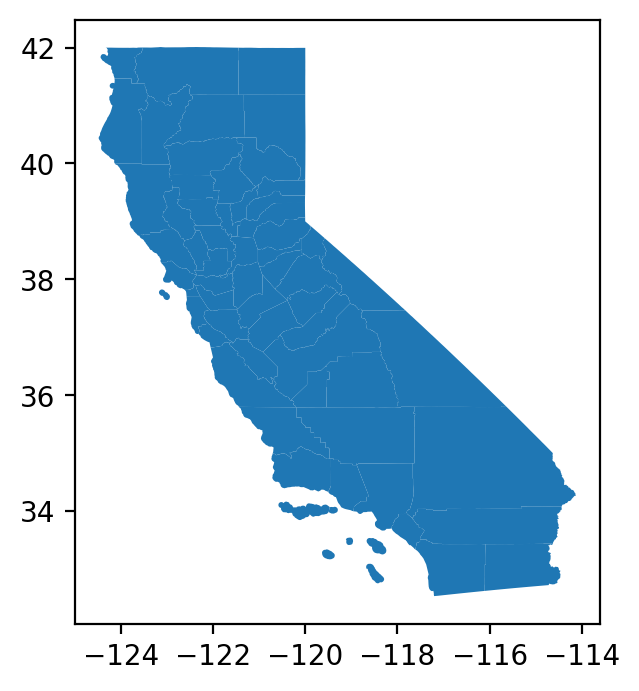

In [19]:
map_df.plot()

In [20]:
# Merge geodata with hospital facility data
merged_map = map_df.set_index('name').join(df_by_county)
merged_map.head()

,statefp,countyfp,countyns,geoid,namelsad,stusab,lsad,classfp,mtfcc,csafp,...,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry,COUNT_FAC,TOTAL_NUMBER_BEDS
name,,,,,,,,,,,,,,,,,,,,,
Kings,06,031,00277280,06031,Kings County,CA,06,H1,G4020,260,...,A,3.600884e+09,3162664.0,+36.0724780,-119.8155301,California,31,"POLYGON ((-119.95892 36.25547, -119.95893 36.2...",1.0,173.0
San Benito,06,069,00277299,06069,San Benito County,CA,06,H1,G4020,488,...,A,3.596591e+09,4719300.0,+36.6116507,-121.0858108,California,69,"POLYGON ((-121.48300 36.76505, -121.48351 36.7...",1.0,82.0
Fresno,06,019,00277274,06019,Fresno County,CA,06,H1,G4020,260,...,A,1.543214e+10,136609898.0,+36.7610058,-119.6550193,California,19,"POLYGON ((-120.42219 36.84014, -120.42172 36.8...",7.0,1732.0
Plumas,06,063,00277296,06063,Plumas County,CA,06,H1,G4020,None,...,A,6.612401e+09,156387636.0,+39.9922953,-120.8243709,California,63,"POLYGON ((-121.36701 40.07767, -121.36688 40.0...",3.0,78.0
Inyo,06,027,01804637,06027,Inyo County,CA,06,H1,G4020,None,...,A,2.641068e+10,76915743.0,+36.5619770,-117.4039269,California,27,"POLYGON ((-118.33758 36.65480, -118.33773 36.6...",2.0,62.0


In [21]:
# Create a function to map the variable
def california_map(variable,maptitle):
    vmin, vmax = 120,120
    fig, ax = plt.subplots(1, figsize=(10,6))
    merged_map.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title(maptitle)

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # empty array for the data range
    sm._A = []
    
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

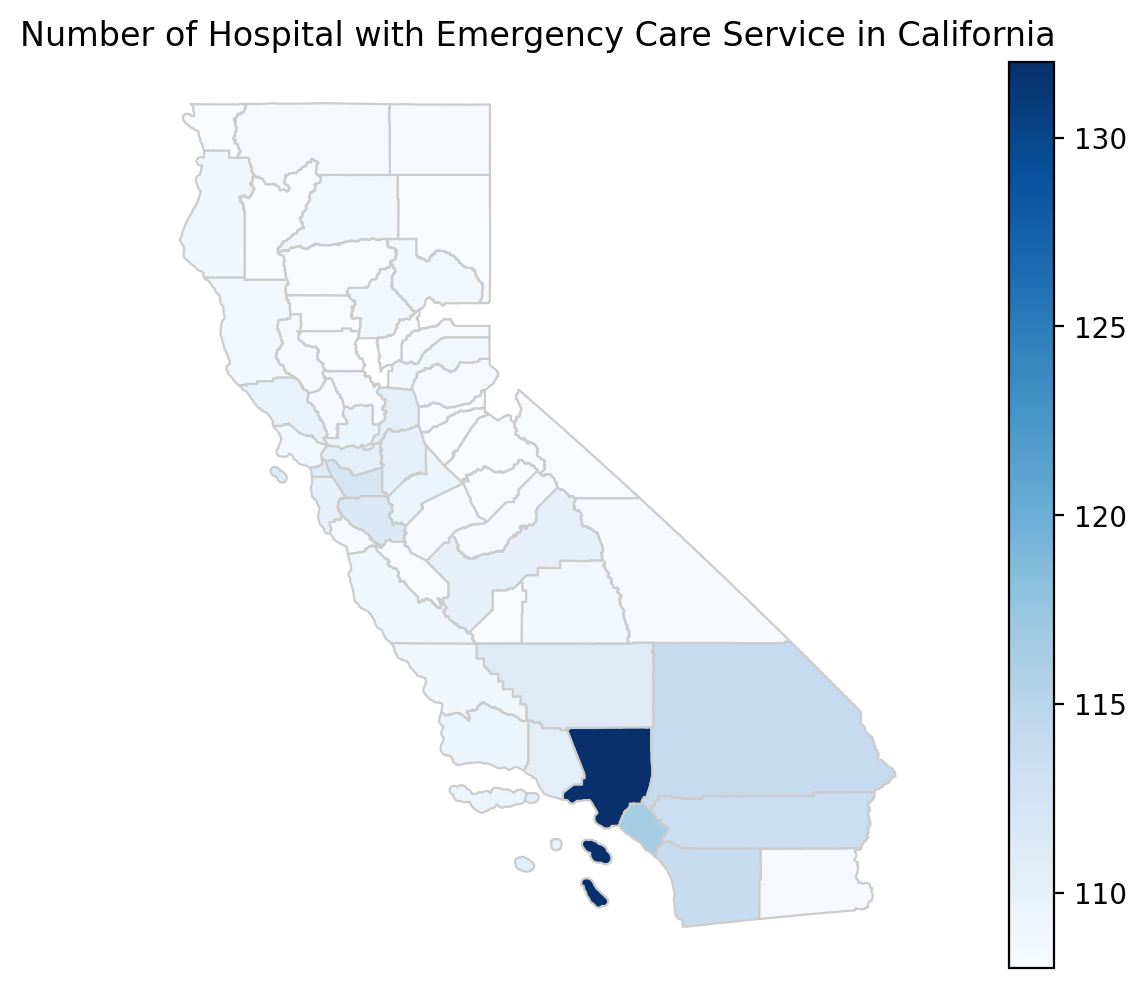

In [22]:
california_map('COUNT_FAC','Number of Hospital with Emergency Care Service in California')

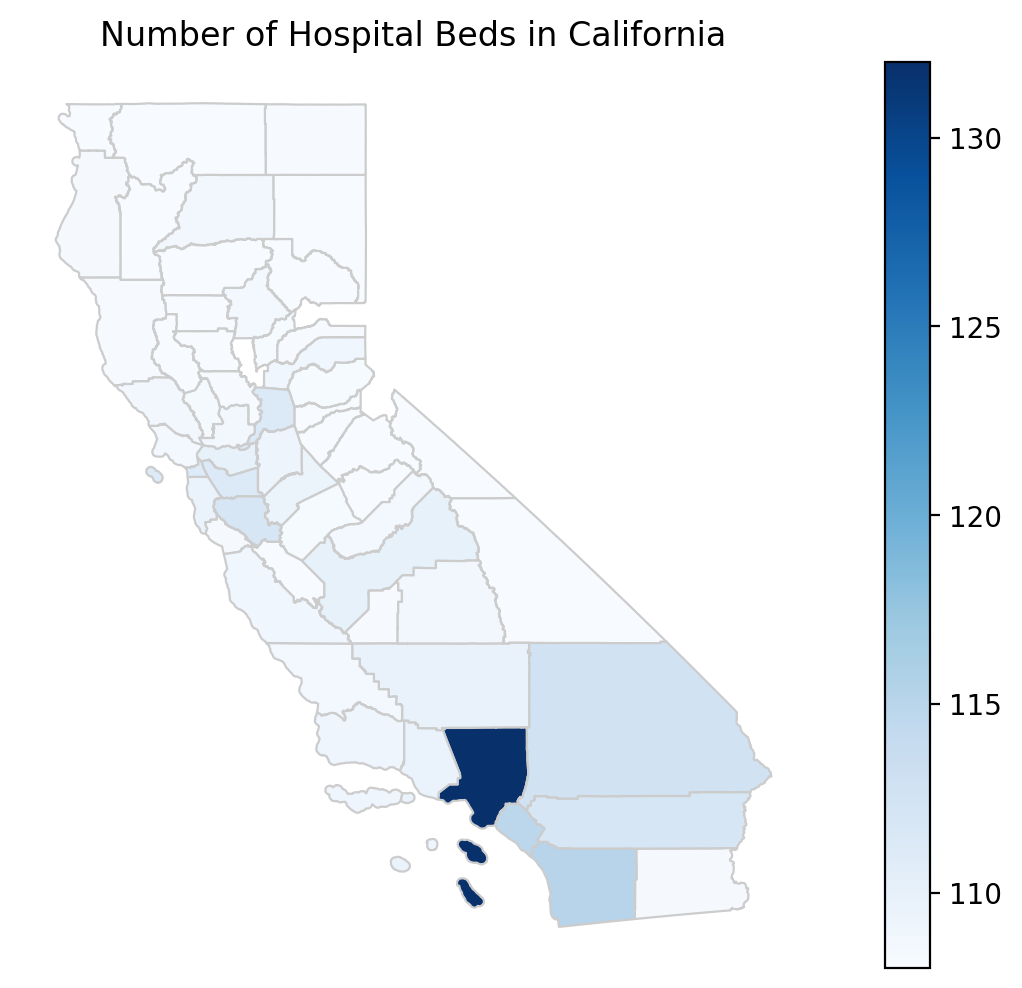

In [23]:
california_map('TOTAL_NUMBER_BEDS','Number of Hospital Beds in California')